In [23]:
def D1(dimension):
    """Used to make a matrix that enables y'(x) = 1/h * D1 * y(x)"""
    import numpy as np

    # Generate the 0 matrix as our starting point
    matrix = np.zeros((dimension,dimension))

    
    

    # Loop to cycle through every single value in the matrix
    for row in range(dimension):
        for column in range(dimension):
        
        # If the row and column have the same values, then we are at a diagonal
            if row - column == 0:
                matrix[row][column] = 1
        
        # If column value is 1 lower than row value, then we are at a value following the diagonal.
            elif column - row == -1:
                matrix[row][column] = -1

                
                
      
    return matrix

# Solving any dy/dx = c with y(0)=k and a<x<b 

In [24]:
def constant_diff(constant, initial, x_max, interv_num):
    """For any dy/dx=c, we find that after some math, we get y(x+h)-y(x)=h*c, which becomes
    D1*y(x)=h*c*[y(0);1;1;...]. This gives us y(x)=D1^{-1}*h*c*I."""
    import numpy as np
    import matplotlib.pyplot as plt
    
    # Make our array of x-inputs and our interval width constant
    x_min = 0
    x_val = np.linspace(x_min, x_max, interv_num+1)
    interv_width = (x_max - x_min) / interv_num
    
    
    
    
    # Generate our I-matrix
    # Start with our initial value at y(0)
    i_matrix = np.array([initial])
    
    # Append 1's for other values of x
    for i in range(interv_num):
        i_matrix = np.append( i_matrix , np.array([1]) )
    
    
    

    # Create our y-values based on our equation y(x) = (interval width) * (constant) * (inverse D1) * (I matrix) 
    y_val = interv_width * constant * np.matmul( np.linalg.inv(D1(interv_num+1)) , i_matrix )
    
    
    
    
    # Plot our values
    plt.plot(x_val, y_val, color="black")
    plt.grid()
    plt.xlabel("X-Axis")
    plt.ylabel("Y-Axis")
    plt.show()

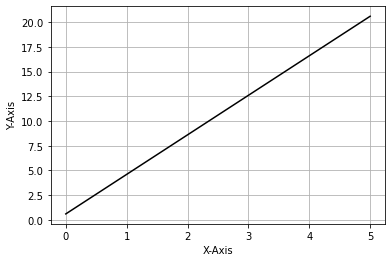

In [25]:
# Testing this out with dy/dx = 4, y(0)=3, 0<x<5, and 100 subintervals
constant_diff(4,3,5,100)

# Solving any dy/dx = "f(x)" with y(0)=k and a<x<b

In [30]:
def func_diff(initial, x_max, interv_num):
    """For any dy/dx="f(x)"", we find that after some math, we get y(x+h)-y(x)=h*"f(x)", which becomes
    D1*y(x)=h*"f(x)"*[y(0);1;1;...]. This gives us y(x)=h*D1^{-1}*[y(0);f(x_0);f(x_1);...;f(x_{n-1})]"."""
    import numpy as np
    import matplotlib.pyplot as plt
    from scipy.linalg import lu_factor
    from scipy.linalg import lu_solve
    
    # Make our array of x-inputs and our interval width constant
    x_min = 0
    x_val = np.linspace(x_min, x_max, interv_num+1)
    interv_width = (x_max - x_min) / interv_num
    
    
    
    
    # Make our array of dy/dx outputs
    # IMPORTANT
    yp_val = x_val ** 3 - 4 * x_val ** 2
    
    
    
    
    # Generate our I-matrix of the form I = [h*f(x_0)+y(0) ; h*f(x_1) ; h*f(x_2) ; etc]
    # We DO NOT WANT h to be multiplied to y(0) as that affects the initial value of the graph
    i_matrix = interv_width * yp_val
    i_matrix[0] += initial
    
    
    
    
    

    # Create our y-values based on our equation y(x) = (interval width) * (inverse D1) * (I matrix)
    # We currently have D1*y(x) = I, which resembles an Ax=B equation.
    
    # It is more optimized to find the LU decomposition of A in Ax=b than solve it than finding the inverse
    A = D1(interv_num+1)
    lu, piv = lu_factor(A)
    y_val = lu_solve((lu, piv), i_matrix)
    
    
    
    
    # Plot our values and the EXACT values for comparison purposes
    plt.plot(x_val, y_val, color="black", linestyle="dotted")
    
    exact_y = (1/4) * x_val ** 4 - (4/3) * x_val ** 3 + 2
    plt.plot(x_val, exact_y, color="black")
    
    #Make cosmetic expectations and display the graph
    plt.grid()
    plt.xlabel("X-Axis")
    plt.ylabel("Y-Axis")
    plt.show()

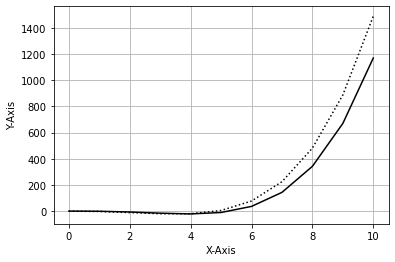

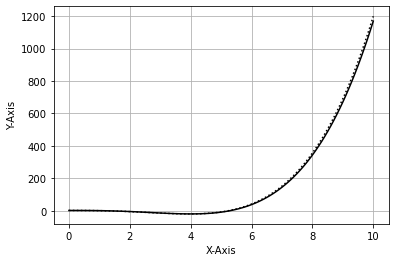

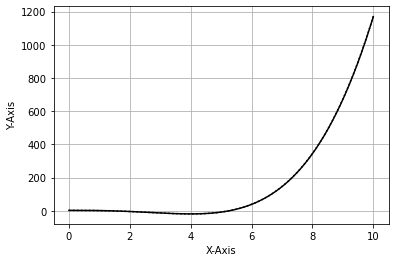

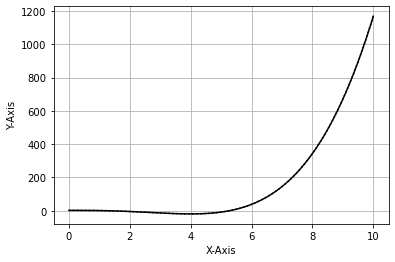

In [32]:
# Testing this out with dy/dx = x^3-4x^2, y(0)=2, 0<x<10, and 1000 subintervals
# Remember the function is func_diff(initial, x_max, interv_num)
func_diff(2,10,10)
func_diff(2,10,100)
func_diff(2,10,1000)
func_diff(2,10,10000)